주성분분석-유방암
==
- 주성분 분석
- 30% 중요 데이터만 사용 SelectPercentile
- tSNE 

In [139]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn import feature_selection
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [153]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
np.random.seed(11)
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

X_train.shape

(398, 30)

In [157]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## 30개의 특성을 모두 사용하는 경우

In [142]:
rfc = RandomForestClassifier(n_estimators=300) 
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test).round(4)

0.9649

## 2개의 특성만 사용하는 경우

In [143]:
# 특성의 이름을 컬럼 명으로 지정
X_train = pd.DataFrame(X_train, columns = cancer.feature_names)
# 상위 20%의 유효한 특성만 선택 (6개))
fs = SelectPercentile(feature_selection.chi2, percentile = 6)
X_train_P = fs.fit_transform(X_train, y_train)
X_train.columns[fs.get_support()]

Index(['mean area', 'worst area'], dtype='object')

In [144]:
columns_new=X_train.columns[fs.get_support()] 
X_test_P = fs.transform(X_test)

rfc_P = RandomForestClassifier(n_estimators=300) 
rfc_P.fit(X_train_P, y_train)
rfc_P.score(X_test_P, y_test).round(4)

0.9181

In [145]:
X_train_P.shape

(398, 2)

## PCA로 두개의 차원만 사용하는 경우

In [147]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

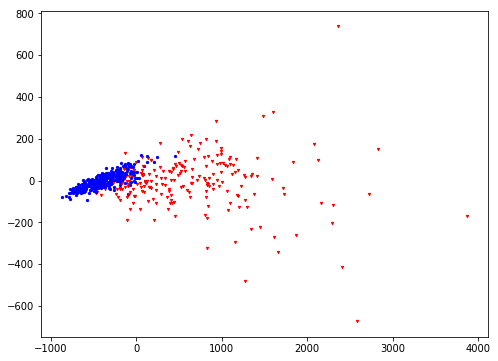

In [148]:
m = ['v', 'o']
c = ['r','b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
    plt.scatter(pca_result[:,0][i],pca_result[:,1][i], marker=m[y[i]], c=c[y[i]], s=5)
plt.show()

In [156]:
pca.components_.round(3)

array([[ 0.005,  0.002,  0.035,  0.517,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   , -0.   ,  0.   , -0.   ,  0.002,  0.056, -0.   ,  0.   ,
         0.   ,  0.   , -0.   , -0.   ,  0.007,  0.003,  0.049,  0.852,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.009, -0.003,  0.063,  0.852, -0.   , -0.   ,  0.   ,  0.   ,
        -0.   , -0.   , -0.   ,  0.   ,  0.001,  0.008,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   , -0.001, -0.013, -0.   , -0.52 ,
        -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ]])

In [152]:
pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_)

(array([0.98204467, 0.01617649]), 0.9982211613741719)

## tSNE 시각화

In [130]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.005s...
[t-SNE] Computed neighbors for 569 samples in 0.029s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 33.679705
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.210552
[t-SNE] Error after 1000 iterations: 0.216433


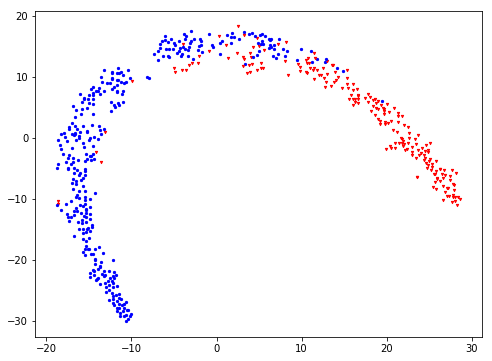

In [131]:
m = ['v','o']
c = ['r','b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
    plt.scatter(tsne_results[:,0][i],tsne_results[:,1][i], marker=m[y[i]], c=c[y[i]], s=5)
plt.show()

### 표준화 후 시각화

In [132]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

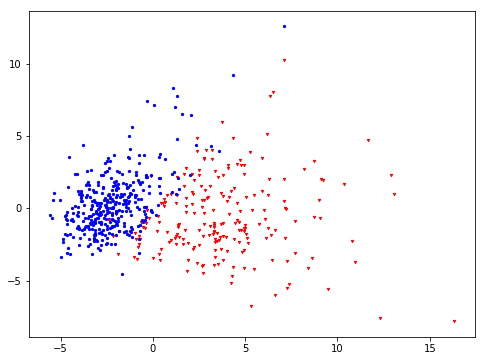

In [134]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_std)
m = ['v', 'o']
c = ['r','b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
    plt.scatter(pca_result[:,0][i],pca_result[:,1][i], marker=m[y[i]], c=c[y[i]], s=5)
plt.show()

In [135]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(X_std)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.002s...
[t-SNE] Computed neighbors for 569 samples in 0.037s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.656212
[t-SNE] Error after 1000 iterations: 0.863724


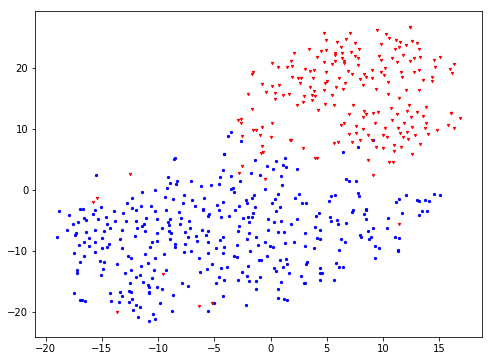

In [137]:
# m = ['v','o']
# c = ['r','b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
    plt.scatter(tsne_results[:,0][i],tsne_results[:,1][i], marker=m[y[i]], c=c[y[i]], s=5)
plt.show()

# ----------연습장-------------

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import feature_selection
from sklearn.feature_selection import SelectPercentile  #영향력 큰 순으로 상위 몇 %만 가져오는 함수
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target


In [8]:
type(X)
X[:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [7]:
type(y)
y[:5]

array([0, 0, 0, 0, 0])

In [4]:
np.random.seed(11)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#주어진 데이터를 test, train으로 나누다
X_train.shape

(398, 30)

In [9]:
cancer.feature_names  #컬럼 이름들

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
#30개의 특성을 모두 사용하는 경우
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test).round(4)

0.9766

In [12]:
X_test.shape
#395개로는 훈련을 하고, 171개로 검증을 한다

(171, 30)

In [13]:
#2개 특성만 사용하는 경우

#특성의 이름을 컬럼 명으로 지정
X_train = pd.DataFrame(X_train, columns = cancer.feature_names)

fs = SelectPercentile(feature_selection.chi2, percentile = 6) #6%의 정보만 쓰겠다
#30개 데이터중 6%는 1.8 = 2개만 사용하다 
#chi square로 상관관계가 가장 높은 2개만 뽑는다
X_train_P = fs.fit_transform(X_train, y_train)
X_train.columns[fs.get_support()]  #get_support() 가장 많이 지지하는 것을 fs 함수로 출력하다

#'mean area', 'worst area': 가 가장 영향력이 큰 데이터이다


Index(['mean area', 'worst area'], dtype='object')

In [14]:
columns_new= X_train.columns[fs.get_support()]
X_test_P = fs.transform(X_test)

rfc_P =RandomForestClassifier(n_estimators=300)
rfc_P.fit(X_train_P, y_train)
rfc_P.score(X_test_P, y_test).round(4)

#0.924
#2개의 특성으로 92% 정확도를 얻다. 

0.924

In [15]:
X_train_P.shape

#feature는 2개

(398, 2)

In [18]:
#PCA(주성분 분석)로 두개의 차원만 사용하는 경우
pca = PCA(n_components=2)  #component 개수를 정할 수 있다., 새로운 feature를 창출해 만들다 
pca_result = pca.fit_transform(X)
#특성이 30개 이지만, 2개의 점수로 환산하자 
#2개의 점수는 특정 2개의 특성이 아니라, 여러 특성들의 조합들로 선형결합을 곱해서 더한 결과이다.

#n_components=2: 컴퓨터가 알아서  대표성이 있는 2개의 component를 뽑는다

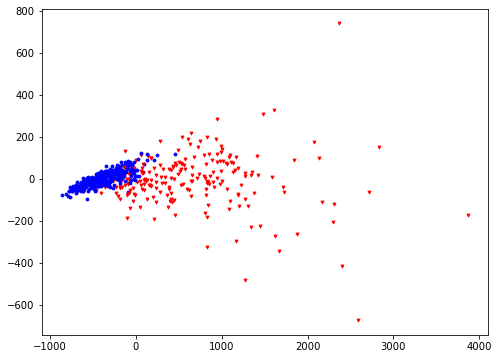

In [19]:
m = ['v', 'o']
c = ['r', 'b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
    plt.scatter(pca_result[:,0][i],pca_result[:,1][i], marker=m[y[i]], c=c[y[i]], s=8)
plt.show()

In [21]:
pca.components_.round() #대부분 0이고, 1이 나온 값이 component의 조합에 사용하는 값들이다.

array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0.,
         0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0., -0.,  0.,  1., -0., -0.,  0.,  0., -0., -0., -0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0., -1., -0., -0.,
        -0., -0., -0., -0.]])

In [22]:
pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_)
#.explained_variance_ratio_:주성분을 가지고 전체 데이터를 얼마나 표현했느냐 

(array([0.98204467, 0.01617649]), 0.9982211613741722)

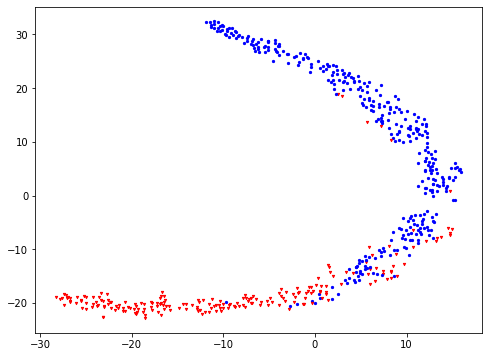

In [23]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(X)

#주성분 분석은 아니지만,
#파란색 점과 빨간색 점을 잘 구분하는 시각화 기술
#tsne는 주성분과는 다르다. 공간에서 가급적 샘플들을 잘 분리하도록 하는 기능이 있다

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.014s...
[t-SNE] Computed neighbors for 569 samples in 0.051s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 33.679708
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.256676
[t-SNE] KL divergence after 1000 iterations: 0.229306


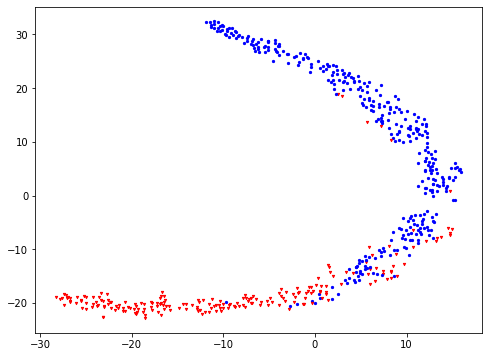

In [25]:
m = ['v','o']
c = ['r','b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
    plt.scatter(tsne_results[:,0][i], tsne_results[:,1][i],marker=m[y[i]], c=c[y[i]], s=5)
plt.show()

#component가 30개 이지만 그림에서 딱 두개의 성분으로 나누다